In [1]:
import numpy as np
import scipy as sp
from scipy import spatial
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.array([[1,2],[2,3],[3,4],[5,6]])
X

array([[1, 2],
       [2, 3],
       [3, 4],
       [5, 6]])

In [4]:
y = np.array([[1,3]])
np.amin(spatial.distance_matrix(X, y))

1.0

In [5]:
X = np.random.rand(90000,2)*500

stime = time.time()
for _ in range(1000):
    y = np.random.rand(1,2)*500
    #print(f'y value is: {y}')
    distances = spatial.distance_matrix(X,y)
    print(f'minimum distance is: {np.amin(distances)}')
    print(f'it occurs at: {np.where(distances==np.amin(distances))}')
    print(f'that point is: {X[np.where(distances==np.amin(distances))[0]]}')
    print('---------------------')
etime = time.time()
print(f'that took: {etime - stime} seconds')

That finds the value for k=1 but I think I can find the higher values of k with a single function. 

np.argpartition shows potential in my research

In [6]:
class KNearestNeighbors():
    def __init__(self, neighbors):
        self.neighbors = neighbors

    def fit(self, data):
        self.data = data

    def predict(self, y):
        dist = spatial.distance_matrix(self.data, y)
        kmin_index = np.argsort(dist, axis=0)
        return self.data[kmin_index[:self.neighbors]], dist[kmin_index[:self.neighbors]]

In [65]:
X = np.random.rand(50,2)*100
y = np.random.rand(1,2) *100


In [8]:
neigh = KNearestNeighbors(5)
neigh.fit(X)
neigh.predict(y)

(array([[[89.23778208, 14.72769357]],
 
        [[94.20207273, 13.78115011]],
 
        [[91.93642847, 14.71663078]],
 
        [[95.32815341, 13.52245999]],
 
        [[98.97754817,  9.66047505]]]), array([[[ 9.83502739]],
 
        [[ 9.90785735]],
 
        [[10.03972986]],
 
        [[10.23912857]],
 
        [[10.34103298]]]))

In [9]:
np.__version__

'1.18.1'

In [10]:
# figuring out how argsort works
dist = spatial.distance_matrix(X, y)
np.argsort(dist, axis=0)

array([[11],
       [13],
       [43],
       [ 8],
       [ 5],
       [35],
       [ 9],
       [27],
       [ 2],
       [18],
       [15],
       [25],
       [44],
       [ 7],
       [21],
       [47],
       [30],
       [31],
       [32],
       [42],
       [41],
       [10],
       [16],
       [36],
       [17],
       [46],
       [12],
       [28],
       [39],
       [48],
       [37],
       [29],
       [22],
       [ 6],
       [40],
       [38],
       [ 3],
       [33],
       [ 1],
       [20],
       [14],
       [34],
       [ 4],
       [24],
       [ 0],
       [26],
       [23],
       [19],
       [49],
       [45]])

In [11]:
# working out getting average distance
distances = []
for x in X:
    y = spatial.distance_matrix(X, x.reshape(1,2))
    distances.append(np.squeeze(y))
np.array(distances).mean(0)

array([55.11003843, 56.17707939, 52.96493333, 46.4925657 , 58.88553427,
       67.1187893 , 68.47352041, 47.64356225, 62.67550546, 60.58069125,
       57.02978415, 58.85695895, 64.98020494, 61.86917396, 56.23302999,
       46.25296734, 63.70931693, 42.49734705, 47.29862367, 70.52186141,
       72.33243538, 60.79339698, 55.77293814, 63.10036258, 66.74341433,
       48.28896013, 53.8086898 , 55.10441852, 44.28360275, 44.86386774,
       41.56149918, 53.41330556, 55.91895904, 46.9382302 , 66.26000559,
       51.2852384 , 56.44119544, 44.45985238, 50.06421607, 63.39458764,
       46.1993393 , 52.51403146, 49.36287271, 60.16736716, 49.14266421,
       74.02132149, 46.63317667, 44.00967469, 44.72127389, 73.77551919])

In [12]:
# figuring out how distance matrix works
y = X[0].reshape(1,2)
spatial.distance_matrix(X, y)

array([[ 0.        ],
       [60.53615435],
       [69.86964173],
       [19.86314309],
       [63.36649036],
       [95.74001049],
       [54.22320507],
       [53.12264838],
       [90.49631502],
       [82.36688407],
       [51.82010409],
       [86.21738284],
       [90.022897  ],
       [89.65819938],
       [12.52385945],
       [66.58571231],
       [90.65481991],
       [28.94798392],
       [69.1723528 ],
       [44.48878895],
       [50.35499317],
       [89.1355225 ],
       [70.89527768],
       [13.03653015],
       [34.01998499],
       [60.82681559],
       [33.61415163],
       [74.62378961],
       [21.26121431],
       [38.27443994],
       [46.88564845],
       [76.45778607],
       [80.84738625],
       [17.07511998],
       [80.01552364],
       [72.43032176],
       [47.12492767],
       [35.71301208],
       [12.70207696],
       [86.52614992],
       [17.62265073],
       [45.15204373],
       [41.42591953],
       [87.64306523],
       [72.45145901],
       [41

In [13]:
from k_means_clustering import KMeansClustering

In [54]:
def get_distances(X):
        '''this little helper function builds out the 
        distances matrix'''
        distances = []
        for x in X:
            y = spatial.distance_matrix(X, x.reshape(1,2))
            distances.append(np.squeeze(y))
        distances = np.array(distances)
        return distances, distances.mean(0)

In [93]:
k = 3
cluster = KMeansClustering(k)
# cluster.fit(X)
X = np.random.rand(50,2)*100
x, y = X.T

in loop


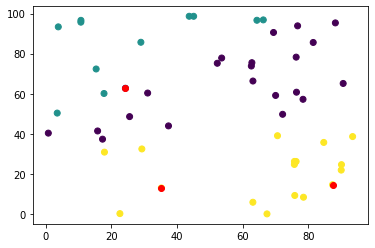

in loop


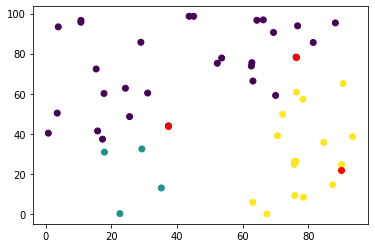

in loop


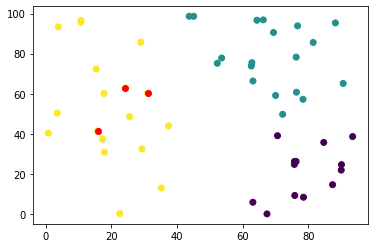

in loop


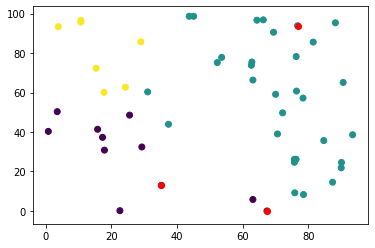

in loop


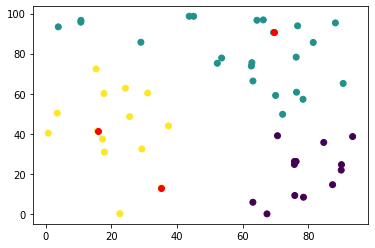

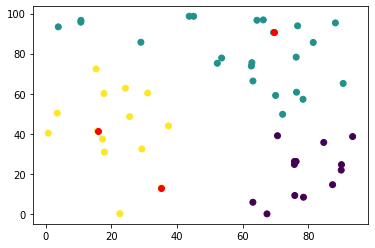

In [97]:
# Select K random points from x 
# to grab a random row from numpy one has to generate a number then grab that row
c_ids = np.random.randint(X.shape[0], size=k)
centers = X[c_ids]
previous = np.random.rand(k, 2).squeeze()

while np.all(previous != centers):
    print('in loop')
    previous = centers.copy()
    # this part needs to loop
    # get the distance from each point to the center
    distances = spatial.distance_matrix(X, centers)
    # Assign to centers
    assignments = np.argmin(distances, axis=1)

    #display the data
    plt.scatter(x, y, c=assignments)
    # Calculate new means
    for i in range(k):
        distances, means = get_distances(X[assignments == i])
        centers[i] = X[np.argmin(means)]
        
    cx, cy = centers.T
    plt.scatter(cx, cy, c='r')
    plt.show()


plt.scatter(x, y, c=assignments)
plt.scatter(cx, cy, c='r')

In [80]:
X[assignments == 2]

array([[69.69037489,  2.58358979],
       [79.81284797,  6.28308597],
       [92.5973111 ,  0.4368599 ],
       [99.96454152, 22.57617486]])

In [81]:
centers[2]

array([11.64567789, 23.3949337 ])